ver: 20220921_1827

In [31]:
# Initialization for this notebook.

import numpy as np
import matplotlib.pyplot as plt

# Un-comment the following line to use interactive matplotlib widget.
#%matplotlib widget

# Returns a n sequence based on the offset provided.
seq_n = lambda seq, noff: np.arange(seq.size) - noff

# Returns a flipped sequence.
seq_flip = lambda seq, noff: (seq[::-1], seq.size - noff - 1)

# Returns a shifted sequence.
seq_shift = lambda seq, noff, m: (seq, noff - m)

# Align 2 sequences
def seq_align(seq1, noff1, seq2, noff2):
    """Align 2 sequences"""
    n_min = min(-noff1, -noff2)
    n_max = max(seq1.size-noff1-1, seq2.size-noff2-1)
    seq1 = np.pad(seq1, (-noff1-n_min, n_max-(seq1.size-noff1-1)), constant_values=(0,0))
    noff1 = -n_min
    seq2 = np.pad(seq2, (-noff2-n_min, n_max-(seq2.size-noff2-1)), constant_values=(0,0))
    noff2 = -n_min
    return (seq1, noff1, seq2, noff2)

# 1.1.3 序列的卷积和

$$ y(n) = x(n)*h(n) = \sum_{m=-\infty}^{\infty} x(m)h(n-m) $$

【例1.1.3-1】设 $x(n)=\{1, \underline{1/2}, 1/4, 1/8\}$，$h(n)=R_3(n)$，求 $y(n) = x(n)*h(n)$

解：

理论推导：用对位相乘相加法，可得
$$
\begin{array}{r}
     x(n): &    &     &    1 & \underline{0.5}   & 0.25  & 0.125 \\
     h(n): &    &     &      &   \underline{1}   &   1   &     1 \\
    \hline
           &    &     &    1 & 0.5   & 0.25  & 0.125 \\
           &    &   1 &  0.5 & 0.25  & 0.125 \\
           &  1 & 0.5 & 0.25 & 0.125 \\
   \hline
     y(n): & 1  & \underline{1.5} & 1.75 & 0.875 & 0.375 & 0.125
\end{array}
$$

编程计算（尝试1）：

x = [1.    0.5   0.25  0.125] , noff_x = 1
h = [1 1 1] , noff_h = 0


Text(0.5, 0, 'n')

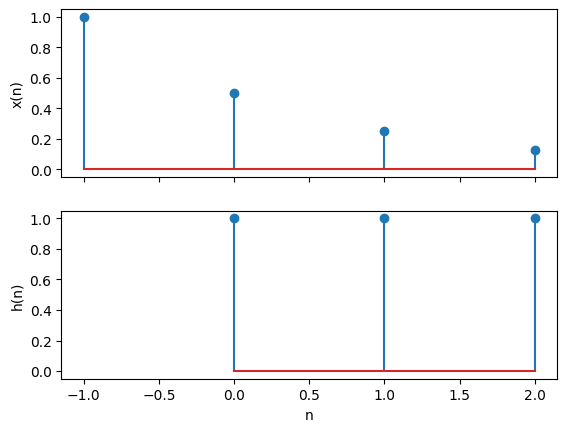

In [32]:
# Define the sequences.

x = np.array([1, 1/2, 1/4, 1/8]); noff_x = 1
h = np.array([1, 1, 1]); noff_h = 0

print("x =", x, ", noff_x =", noff_x)
print("h =", h, ", noff_h =", noff_h)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(n)')
axs[1].stem(seq_n(h, noff_h), h)
axs[1].set_ylabel('h(n)')
axs[1].set_xlabel('n')

(1) 翻褶：选哑变量为$m$，将$h(m)$以$m=0$的垂直轴为对称轴翻褶成$h(-m)$。

h_flip = [1 1 1] , noff_h_flip = 2


Text(0.5, 0, 'm')

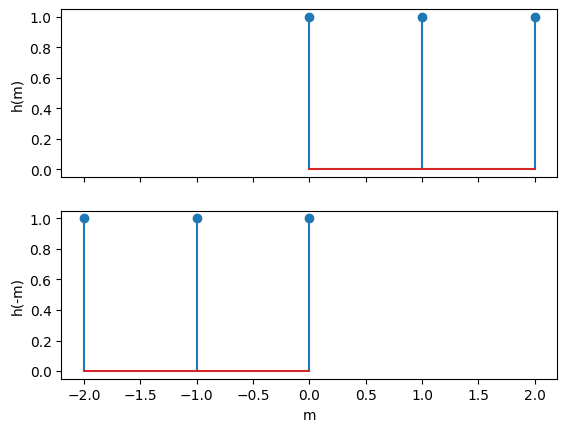

In [33]:
(h_flip, noff_h_flip) = seq_flip(h, noff_h)

print("h_flip =", h_flip, ", noff_h_flip =", noff_h_flip)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(h, noff_h), h)
axs[0].set_ylabel('h(m)')
axs[1].stem(seq_n(h_flip, noff_h_flip), h_flip)
axs[1].set_ylabel('h(-m)')
axs[1].set_xlabel('m')

(2) 移位：为计算 $y(n)$ 其中的一个值 $y(n=-1)$，将$h(-m)$移位$n$，得$h(n-m)$。

h_flip_shift = [1 1 1] , noff_h_flip_shift = 3


Text(0.5, 0, 'm')

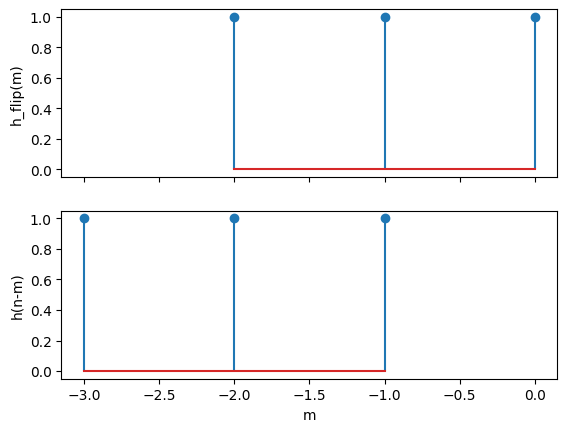

In [34]:
n = -1

(h_flip_shift, noff_h_flip_shift) = seq_shift(h_flip, noff_h_flip, n)

print("h_flip_shift =", h_flip_shift, ", noff_h_flip_shift =", noff_h_flip_shift)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(h_flip, noff_h_flip), h_flip)
axs[0].set_ylabel('h_flip(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[1].set_xlabel('m')

(3) 相乘：将$h(n-m)$与$x(m)$在相同$m$处的对应值相乘。

Text(0.5, 0, 'm')

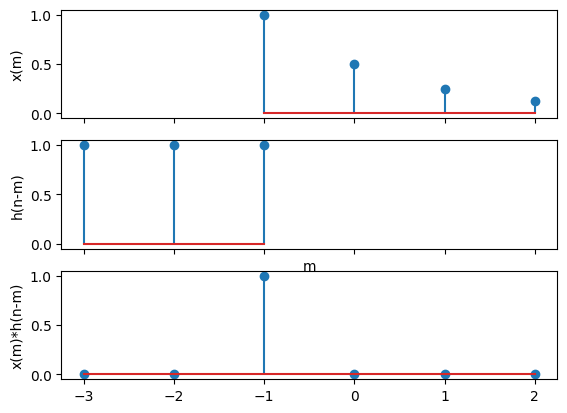

In [35]:
(x1, noff_x1, h1, noff_h1) = seq_align(x, noff_x, h_flip_shift, noff_h_flip_shift)
x_dot_h_flip_shift = x1*h1
noff_x_dot_h_flip_shift = noff_x1

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)
axs[0].stem(seq_n(x, noff_x), x)
axs[0].set_ylabel('x(m)')
axs[1].stem(seq_n(h_flip_shift, noff_h_flip_shift), h_flip_shift)
axs[1].set_ylabel('h(n-m)')
axs[2].stem(seq_n(x_dot_h_flip_shift, noff_x_dot_h_flip_shift), x_dot_h_flip_shift)
axs[2].set_ylabel('x(m)*h(n-m)')
axs[1].set_xlabel('m')

(4) 相加：将以上所有$m$处的乘积值叠加，就得到$y(-1)$。

In [36]:
y = sum(x_dot_h_flip_shift)
print(y)

1.0


【要点】

- 以上只计算了其中一个$y(n)$的值，即$y(n=-1)$。
- 理论上$y(n)$是无限长的，但因为只当$h(n-m)$和$x(m)$有非零元素重叠的时候，$y(n)$才可能是非零值。因此一般认为$y(n)$是有限长的，且只在$h(n-m)$和$x(m)$有非零元素重叠时的$n$上有定义。在本例中，$y(n)$就只在$-1 \leqslant n \leqslant 5$上有定义。

编程计算（尝试2）：为了能一次过计算任意两个序列的卷积和，编写以下通用函数。

In [37]:
# Build a general function for computing convolution of two seqences.

# The API of the function:
#
#  seq_conv(seq1, noff1, seq2, noff2)
#     Returns the discrete, linear convolution of two sequences.
#
#     Parameters: 
#         seq1, seq2: array_like
#             The 2 input sequences.
#         noff1, noff： int
#             n's offsets of the 2 input sequences.
#     Returns: (seq, noff)
#         seq: array_like
#             The output sequence.
#         noff: int
#             n's offset of the output sequence.

In [38]:
# ---------------------------
# Teacher's demo code
# ---------------------------
def seq_conv(seq1, noff1, seq2, noff2):
    # The total length of the output sequence.
    N = len(seq1) + len(seq2) - 1 # ?

    # Step 1: Flip
    (seq2_flip, noff2_flip) = seq_flip(seq2, noff2)

    # Find the range of n where two sequences overlap.
    n_min = -noff1 - (len(seq2) - noff2_flip - 1) # ?
    n_max = n_min + N

    # Allocate space for the output sequence.
    seq = np.zeros(N)
    seq_i = 0

    for n in range(n_min, n_max):
        # Step 2: Shift
        (seq2_flip_shift, noff2_flip_shift) = seq_shift(seq2_flip, noff2_flip, n)

        # Step 3: Multiply
        (x1, noff_x1, h1, noff_h1) = seq_align(seq1, noff1, seq2_flip_shift, noff2_flip_shift)
        x_dot_h_flip_shift = x1*h1
        noff_x_dot_h_flip_shift = noff_x1

        # Step 4: Sum
        seq[seq_i] = sum(x_dot_h_flip_shift)

        seq_i = seq_i + 1

    # Compute the offset of the output sequence.
    noff = noff1 + noff2 # ?

    return (seq, noff)

编写单元测试函数以验证函数`seq_conv`的正确性：

【注】这个测试函数比较接近工程上真正使用的形式，即能够自动计算预期值和计算值之间的误差。

x = [1.    0.5   0.25  0.125] , noff_x = 1
h = [1 1 1] , noff_h = 0
y   = [1.    1.5   1.75  0.875 0.375 0.125] , noff_y = 1
err = [0. 0. 0. 0. 0. 0.]
x = [1.    0.5   0.25  0.125] , noff_x = -1
h = [-1  1] , noff_h = 1
y   = [-1.     0.5    0.25   0.125  0.125] , noff_y = 0
err = [0. 0. 0. 0. 0.]
x = [1.    0.5   0.25  0.125] , noff_x = 0
h = [1 2 3 4] , noff_h = -1
y   = [1.    2.5   4.25  6.125 3.    1.375 0.5  ] , noff_y = -1
err = [0. 0. 0. 0. 0. 0. 0.]


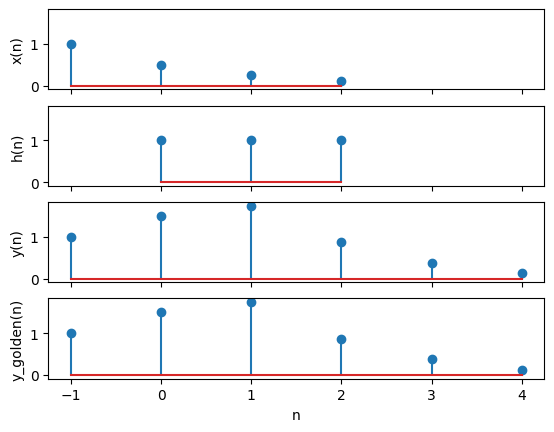

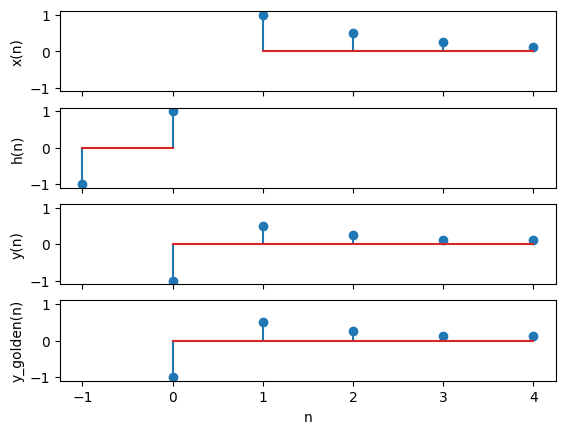

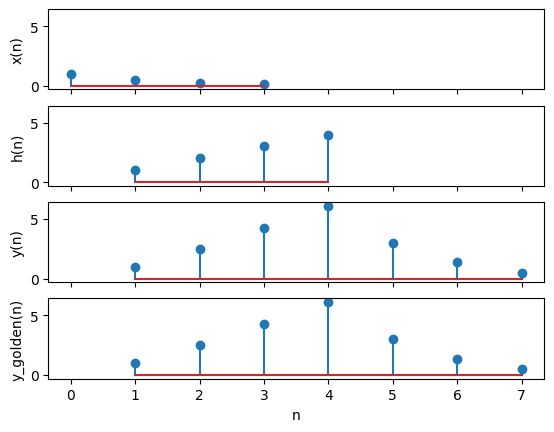

In [39]:
# Unit test for seq_conv()
def test_seq_conv():
    def do_one_test(x, noff_x, h, noff_h):
        (y, noff_y) = seq_conv(x, noff_x, h, noff_h)

        print("x =", x, ", noff_x =", noff_x)
        print("h =", h, ", noff_h =", noff_h)
        print("y   =", y, ", noff_y =", noff_y)

        # We use results from Numpy's convolve() as our ground truth.
        y_golden = np.convolve(x, h)
        err = y_golden - y
        print("err =", err)
        assert np.sum(np.abs(err))==0, "err is not all zeros!"

        fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
        axs[0].stem(seq_n(x, noff_x), x)
        axs[0].set_ylabel('x(n)')
        axs[1].stem(seq_n(h, noff_h), h)
        axs[1].set_ylabel('h(n)')
        axs[2].stem(seq_n(y, noff_y), y)
        axs[2].set_ylabel('y(n)')

        # Caution: Numpy's convolve() does not deal with offset, so we have to check it manually.
        axs[3].stem(seq_n(y_golden, noff_y), y_golden)

        axs[3].set_ylabel('y_golden(n)')
        axs[3].set_xlabel('n')

    do_one_test(np.array([1, 1/2, 1/4, 1/8]), 1, np.array([1, 1, 1]), 0)
    do_one_test(np.array([1, 1/2, 1/4, 1/8]), -1, np.array([-1, 1]), 1)
    do_one_test(np.array([1, 1/2, 1/4, 1/8]), 0, np.array([1, 2, 3, 4]), -1)


test_seq_conv()

【结论】

- 单元测试的3组测试都与预期值相同，可以认为`seq_conv`函数是正确的。
- 单元测试的第1组结果，也正是本例子中所要求的卷积和计算结果。

【作业1.1.3-1】

设 $x(n)=\{\underline{1}, 2, 4, 3, 6\}$，$h(n)=\{2, 1, \underline{5}, 7\}$，求 $y(n) = x(n)*h(n)$。

要求：

- 理论推导，采用对位相乘相加法，并用 Markdown + LaTex 语法书写。（可参考模仿【例1.1.3-1】的理论推导。）
- 编程计算，直接调用两个现成函数得出两个结果：
  - 上文已经编写好的`seq_conv`函数。
  - `Numpy`中的`convolve`函数。（注意：`convolve`函数并没有计算下标$n$的偏移量的功能，因此需要额外补充相关计算的代码。）
- 结论中对比三个结果是否一致。

解：

理论推导：用对位相乘相加法，可得
$$
\begin{array}{r}
     x(n): &   &   &   &   &   &   &   &   &   &\underline{1}  &  2&  4&  3&  6\\
     h(n): &   &   &   &   &   &   &   &  2&  1&\underline{5}  &  7&   &   &   \\
   \hline
     y(n): &   &   &   &   &   &   &   &   &   &  0&  0&  0&  0&  0&   &   &   &   &   &   &    \\
           &   &   &   &   &   &   &   &   &  0&  0&  0&  0&  0&   &   &   &   &   &   &   &    \\
           &   &   &   &   &   &   &   &  0&  0&  0&  0&  0&   &   &   &   &   &   &   &   &    \\
           &   &   &   &   &   &   &  7& 14& 28& 21& 42&   &   &   &   &   &   &   &   &   &    \\
           &   &   &   &   &   &  5& 10& 20& 15& 30&   &   &   &   &   &   &   &   &   &   &    \\
           &   &   &   &   &  1&  2&  4&  3&  6&   &   &   &   &   &   &   &   &   &   &   &    \\
           &   &   &   &  2&  4& 8&  6& 12&   &   &   &   &   &   &   &   &   &   &   &   &    \\
   \hline
           &   &   &   &   2&   5&\underline{15}&  27&  49&  49&  51&  42&  0&  0&  0\\
\end{array}
$$

In [40]:
# 蓝天宇2022101937物联网工程
# 定义输入序列x，一个numpy数组
x = np.array([1, 2, 4, 3, 6])
# 输入序列x的偏移量，初始化为0
noff_x = 0
# 定义冲激响应序列h，一个numpy数组
h = np.array([2, 1, 5, 7])
# 冲激响应序列h的偏移量，初始化为-2
noff_h = -2

# 使用seq_conv函数计算卷积
# 调用seq_conv函数计算x和h的卷积，返回卷积结果和偏移量
y_seq_conv, noff_y_seq_conv = seq_conv(x, noff_x, h, noff_h)

# 使用numpy的convolve函数计算x和h的卷积，返回卷积结果
y_convolve = np.convolve(x, h)

# 计算numpy convolve结果的偏移量，为输入序列和冲激响应序列偏移量之和
noff_y_convolve = noff_x + noff_h

# 输出结果
# 打印使用seq_conv函数的卷积结果和偏移量
print(f"使用seq_conv函数的卷积结果: {y_seq_conv} 偏移量 {noff_y_seq_conv}")
# 打印使用numpy convolve函数的卷积结果和偏移量
print(f"使用numpy convolve函数的卷积结果: {y_convolve} 偏移量 {noff_y_convolve}")  

使用seq_conv函数的卷积结果: [ 2.  5. 15. 27. 49. 49. 51. 42.] 偏移量 -2
使用numpy convolve函数的卷积结果: [ 2  5 15 27 49 49 51 42] 偏移量 -2


结论：三个结果一致，符合计算要求